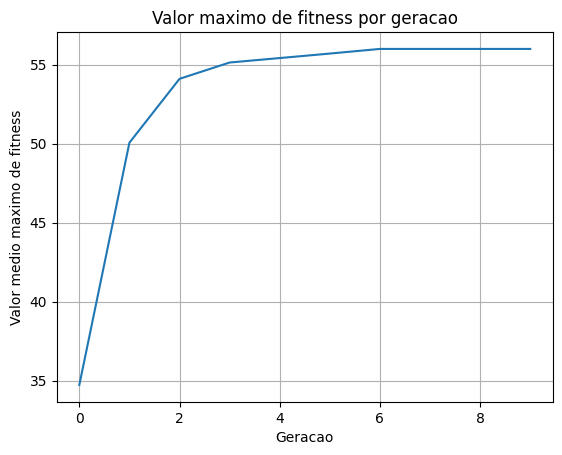

In [14]:
from modules.chromosome import Chromosome
from modules.genetic import Genetic
from matplotlib import pyplot as plt

num_of_generations = 10
population_size = 1000
fitness_history: list[float] = []
percent_mutation = 0.3
population = Genetic.population_generate(population_size)

for generation in range(num_of_generations):
    fitness_ratio, fitness_media = Genetic.get_fitnes_ratio(population)
    fitness_history.append(fitness_media)

    new_population: list[Chromosome] = []
    for _ in range(population_size):
        x, y = Genetic.roulette_selection(population, fitness_ratio)
        individual = Genetic.crossover(x, y)
        new_population.append(Genetic.mutation(individual, percent_mutation))

    combined_population = population + new_population
    combined_fitness = [Genetic.fitness(individual.get_number()) for individual in combined_population]
    combined_population.sort(key=lambda x: Genetic.fitness(x.get_number()), reverse=True)

    population = combined_population[:population_size] 

plt.plot(fitness_history)  # type: ignore
plt.grid(True, zorder=0)  # type: ignore
plt.title("Valor maximo de fitness por geracao")  # type: ignore
plt.xlabel("Geracao")  # type: ignore
plt.ylabel("Valor medio maximo de fitness")  # type: ignore
plt.show()  # type: ignore
